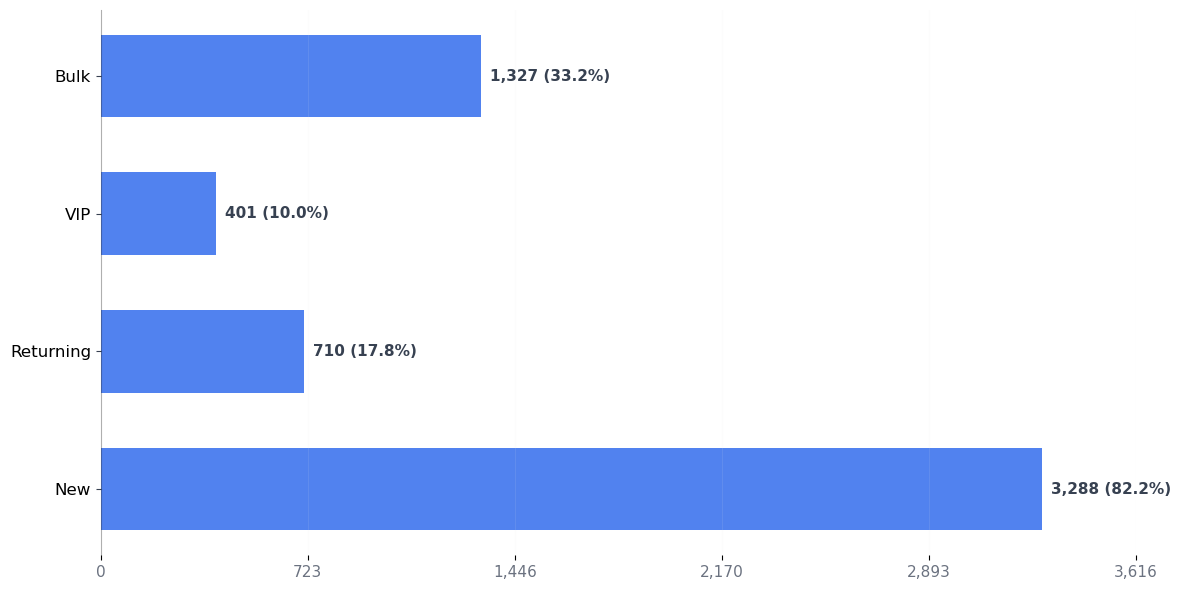

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv('Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

customer_orders = df.groupby('customer_id').agg({
    'order_date': ['min', 'max', 'count'],
    'after_discount': 'sum'
}).reset_index()

customer_orders.columns = ['customer_id', 'first_order', 'last_order', 'order_count', 'total_spent']

new_customers = customer_orders[customer_orders['order_count'] == 1]
new_count = len(new_customers)

returning_customers = customer_orders[customer_orders['order_count'] > 1]
returning_count = len(returning_customers)

vip_threshold = customer_orders['total_spent'].quantile(0.9)
vip_customers = customer_orders[customer_orders['total_spent'] >= vip_threshold]
vip_count = len(vip_customers)

customer_quantity = df.groupby('customer_id')['qty_ordered'].sum().reset_index()
bulk_threshold = customer_quantity['qty_ordered'].quantile(0.8)
bulk_customers = customer_quantity[customer_quantity['qty_ordered'] >= bulk_threshold]
bulk_count = len(bulk_customers)

total_customers = len(customer_orders)

new_pct = (new_count / total_customers) * 100
returning_pct = (returning_count / total_customers) * 100
vip_pct = (vip_count / total_customers) * 100
bulk_pct = (bulk_count / total_customers) * 100

fig, ax = plt.subplots(figsize=(12, 6))

segments = ['New', 'Returning', 'VIP', 'Bulk']
customer_counts = [new_count, returning_count, vip_count, bulk_count]
customer_percentages = [new_pct, returning_pct, vip_pct, bulk_pct]

bars = ax.barh(segments, customer_counts, color='#2563EB', alpha=0.8, height=0.6)

for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_alpha(0.3)

max_count = max(customer_counts)
xticks = np.linspace(0, max_count * 1.1, 6)
ax.set_xticks(xticks)
ax.set_xticklabels([f'{int(x):,}' for x in xticks], fontsize=11, color='#6B7280')

for bar, value, pct in zip(bars, customer_counts, customer_percentages):
    ax.text(bar.get_width() + max_count * 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:,} ({pct:.1f}%)', ha='left', va='center', fontsize=11, color='#374151',
            fontweight='bold')

ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=12, color='#374151')

ax.grid(axis='x', alpha=0.1, color='#E5E7EB', linestyle='-')

plt.tight_layout()
plt.savefig('customer_segments_horizontal.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()